# Wine Quality Dataset

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Concrete Compressive Strength Dataset
dataset = pd.read_csv('winequality-red.csv',sep=";",header=1)
data = pd.DataFrame(dataset)

In [2]:
# Check if dataset has null values
result = dataset.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column:     ")
print(result.sum())

# from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
# imp.fit(train)
# train= imp.transform(train)

-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column:     
7.4       0
0.7       0
0         0
1.9       0
0.076     0
11        0
34        0
0.9978    0
3.51      0
0.56      0
9.4       0
5         0
dtype: int64


In [3]:
X = data.iloc[:, :11].values
Y = data.iloc[:, 11].values

print(data)
print(X.shape)
print(Y.shape)

       7.4    0.7     0  1.9  0.076    11    34   0.9978  3.51  0.56   9.4  5
0      7.8  0.880  0.00  2.6  0.098  25.0  67.0  0.99680  3.20  0.68   9.8  5
1      7.8  0.760  0.04  2.3  0.092  15.0  54.0  0.99700  3.26  0.65   9.8  5
2     11.2  0.280  0.56  1.9  0.075  17.0  60.0  0.99800  3.16  0.58   9.8  6
3      7.4  0.700  0.00  1.9  0.076  11.0  34.0  0.99780  3.51  0.56   9.4  5
4      7.4  0.660  0.00  1.8  0.075  13.0  40.0  0.99780  3.51  0.56   9.4  5
...    ...    ...   ...  ...    ...   ...   ...      ...   ...   ...   ... ..
1593   6.2  0.600  0.08  2.0  0.090  32.0  44.0  0.99490  3.45  0.58  10.5  5
1594   5.9  0.550  0.10  2.2  0.062  39.0  51.0  0.99512  3.52  0.76  11.2  6
1595   6.3  0.510  0.13  2.3  0.076  29.0  40.0  0.99574  3.42  0.75  11.0  6
1596   5.9  0.645  0.12  2.0  0.075  32.0  44.0  0.99547  3.57  0.71  10.2  5
1597   6.0  0.310  0.47  3.6  0.067  18.0  42.0  0.99549  3.39  0.66  11.0  6

[1598 rows x 12 columns]
(1598, 11)
(1598,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give 93.7948904411872 accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressior']
models = [SVR(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          AdaBoostRegressor(),
          GaussianProcessRegressor(kernel=kernel),
          LinearRegression(),
          MLPRegressor()]

param_distributions = {
    'SVR': {'C': [0.01, 0.1, 1, 10], 'gamma':[0.01, 0.1, 1]},
    'DecisionTreeRegressor': {'max_depth': [1, 10, 20, None],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10]},
    'RandomForestRegressor': {'max_depth': [1, 10, 20, 40, None],'n_estimators': [16, 32, 100],'bootstrap': [True, False],},
    'AdaBoostRegressor': {'n_estimators': [16, 32, 100],'learning_rate' : [0.2,0.4,1]},
    'GaussianProcessRegressor': {'normalize_y': ['True','False']},
    'LinearRegression': {},
    'MLPRegressior': {'hidden_layer_sizes': [(100,),(200,)],'activation':['tanh', 'relu'], 'max_iter':[200,300]},
}

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    np.random.seed(0);
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=2, cv=3)
    gridcv.fit(X_train, Y_train)
    Y_pred  = gridcv.best_estimator_.predict(X_test)
    accuracy[counter] = round(mean_squared_error(Y_test, Y_pred), 3)
    print("MSE for " + names[counter] + ": "+str(accuracy[counter]))

MSE for SVR: 0.424


MSE for DecisionTreeRegressor: 0.538


MSE for RandomForestRegressor: 0.368


MSE for AdaBoostRegressor: 0.433


MSE for GaussianProcessRegressor: 0.439


MSE for LinearRegression: 0.439


MSE for MLPRegressior: 0.432


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Wine Quality Dataset model accuracy')

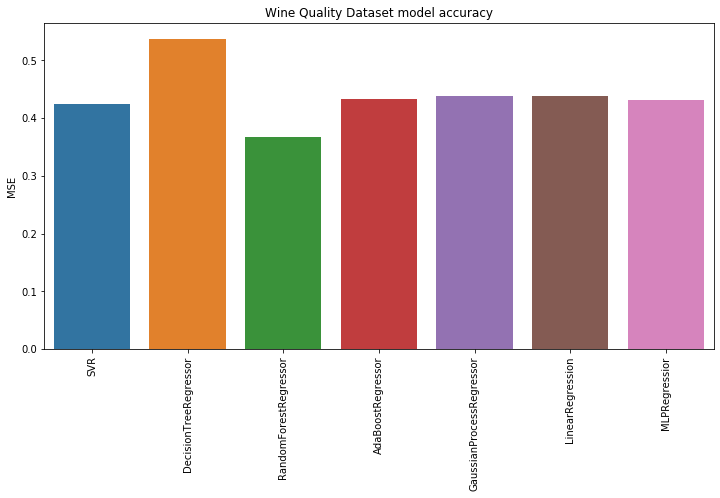

In [7]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('MSE')
plt.title('Wine Quality Dataset model accuracy')